# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [4]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.3.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [8]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [9]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

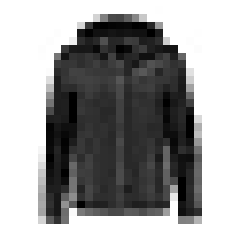

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [12]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [14]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [15]:
X_valid.shape

(5000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

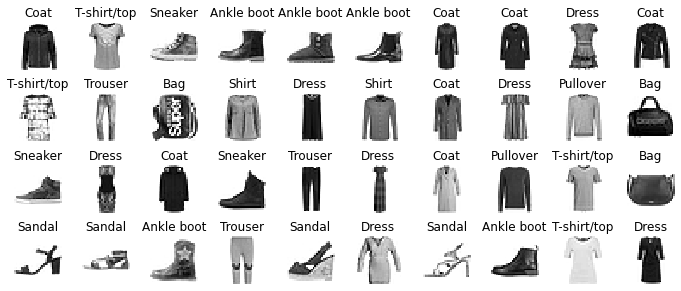

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.layers

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


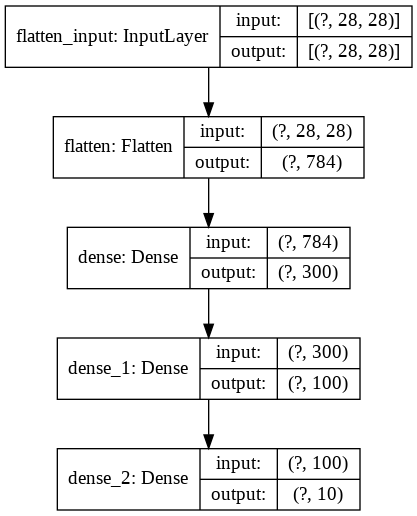

In [23]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
model.get_layer(hidden1.name) is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.01342862,  0.01043853,  0.00067923, ..., -0.02381896,
        -0.06863397,  0.03148931],
       [ 0.05316801,  0.02900838, -0.06660262, ..., -0.03422189,
        -0.07418638,  0.06243904],
       [-0.05936707,  0.0334303 , -0.04792805, ...,  0.01758252,
        -0.03481923,  0.00128081],
       ...,
       [ 0.07384484, -0.0626557 , -0.01061916, ...,  0.03247853,
        -0.0423592 , -0.03579176],
       [-0.01410741, -0.02385754, -0.04226847, ..., -0.00733756,
        -0.04916498,  0.02030785],
       [ 0.02348933, -0.01729166, -0.04776473, ..., -0.04564814,
        -0.01054791, -0.06456779]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [32]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7226 - accuracy: 0.7679 - val_loss: 0.5182 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4872 - accuracy: 0.8316 - val_loss: 0.4571 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8444 - val_loss: 0.4302 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4158 - accuracy: 0.8541 - val_loss: 0.4257 - val_accuracy: 0.8484
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8612 - val_loss: 0.4040 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3797 - accuracy: 0.8652 - val_loss: 0.3983 - val_accuracy: 0.8600
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3661 - accuracy: 0.8706 - val_loss: 0.3749 - val_accuracy:

In [33]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

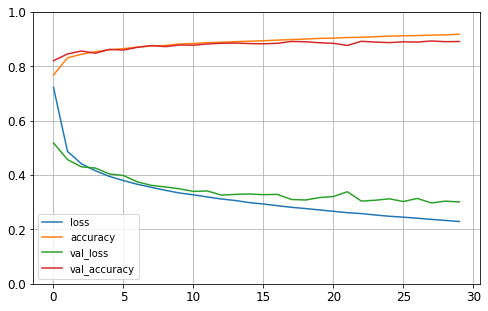

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8856


[0.3250580430030823, 0.8855999708175659]

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.97, 0.  , 0.02, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

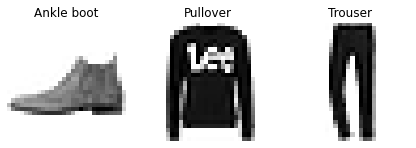

In [41]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) repeat with more layers
#### 5) apply on different datasets

Solution

1) Plot Learning curves when using different optimizers

Adam optimizer

In [42]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

# Train the Model
history_Adam = model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3803 - accuracy: 0.8621 - val_loss: 0.3432 - val_accuracy: 0.8782
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3301 - accuracy: 0.8782 - val_loss: 0.3489 - val_accuracy: 0.8730
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3096 - accuracy: 0.8865 - val_loss: 0.3184 - val_accuracy: 0.8844
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2895 - accuracy: 0.8930 - val_loss: 0.3396 - val_accuracy: 0.8750
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2749 - accuracy: 0.8983 - val_loss: 0.3154 - val_accuracy: 0.8850
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9008 - val_loss: 0.3084 - val_accuracy: 0.8964
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2513 - accuracy: 0.9051 - val_loss: 0.3418 - val_accuracy:

In [43]:
#History
print("History Params : ", history_Adam.params)
print("History Epoch : ", history_Adam.epoch)
print("History Keys : " ,history_Adam.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


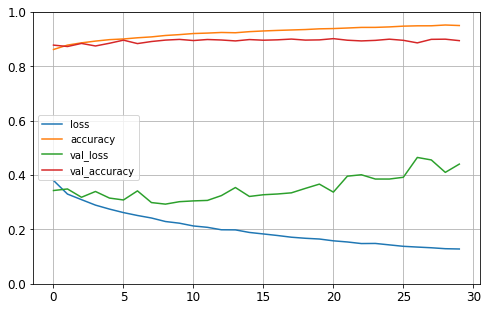

In [44]:
#Learning Curves
pd.DataFrame(history_Adam.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
RMSprop optimizer

In [45]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="RMSprop",metrics=["accuracy"])

# Train the Model
history_RMSprop = model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1288 - accuracy: 0.9516 - val_loss: 0.5626 - val_accuracy: 0.8932
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1328 - accuracy: 0.9507 - val_loss: 0.5831 - val_accuracy: 0.8946
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1393 - accuracy: 0.9501 - val_loss: 0.5998 - val_accuracy: 0.8978
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1497 - accuracy: 0.9474 - val_loss: 0.6944 - val_accuracy: 0.8922
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1549 - accuracy: 0.9465 - val_loss: 0.7291 - val_accuracy: 0.8932
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1599 - accuracy: 0.9457 - val_loss: 0.7674 - val_accuracy: 0.8898
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1602 - accuracy: 0.9452 - val_loss: 0.7479 - val_accuracy:

In [46]:
#History
print("History Params : ", history_RMSprop.params)
print("History Epoch : ", history_RMSprop.epoch)
print("History Keys : " ,history_RMSprop.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


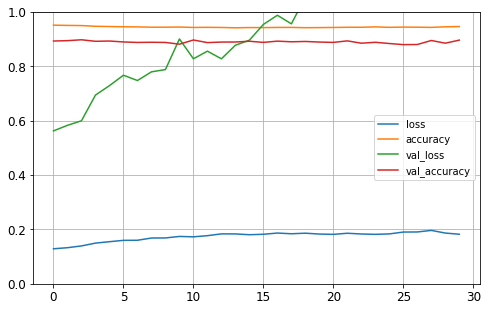

In [47]:
#Learning Curves
pd.DataFrame(history_RMSprop.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2) Plot Learning curves when using different batch size

Batch Size = 100

In [48]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_Batch100 = model.fit(X_train, y_train, batch_size=100, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
550/550 [==============================] - 3s 6ms/step - loss: 15.1185 - accuracy: 0.2765 - val_loss: 2.2470 - val_accuracy: 0.2158
Epoch 2/30
550/550 [==============================] - 3s 5ms/step - loss: 1.7376 - accuracy: 0.3606 - val_loss: 1.3297 - val_accuracy: 0.5260
Epoch 3/30
550/550 [==============================] - 3s 5ms/step - loss: 1.2027 - accuracy: 0.5803 - val_loss: 1.0899 - val_accuracy: 0.5968
Epoch 4/30
550/550 [==============================] - 3s 5ms/step - loss: 0.9201 - accuracy: 0.6689 - val_loss: 0.8342 - val_accuracy: 0.7352
Epoch 5/30
550/550 [==============================] - 3s 5ms/step - loss: 0.7517 - accuracy: 0.7424 - val_loss: 0.6738 - val_accuracy: 0.7998
Epoch 6/30
550/550 [==============================] - 3s 5ms/step - loss: 0.6453 - accuracy: 0.7813 - val_loss: 0.7884 - val_accuracy: 0.7308
Epoch 7/30
550/550 [==============================] - 3s 5ms/step - loss: 0.5936 - accuracy: 0.7926 - val_loss: 0.6372 - val_accuracy: 0.7836
Epoch

In [49]:
#History
print("History Params : ", history_Batch100.params)
print("History Epoch : ", history_Batch100.epoch)
print("History Keys : " ,history_Batch100.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 550}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


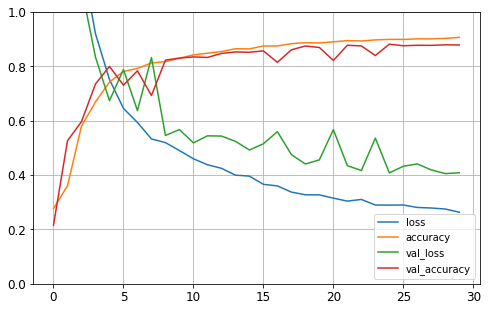

In [50]:
#Learning Curves
pd.DataFrame(history_Batch100.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 Plot Learning curves when using different number of epochs

Epochs = 10

In [51]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_Epochs10 = model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9384 - accuracy: 0.7192 - val_loss: 0.5747 - val_accuracy: 0.7864
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5027 - accuracy: 0.8115 - val_loss: 0.7688 - val_accuracy: 0.7210
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4305 - accuracy: 0.8439 - val_loss: 0.4672 - val_accuracy: 0.8540
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4049 - accuracy: 0.8555 - val_loss: 0.4084 - val_accuracy: 0.8712
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8662 - val_loss: 0.4200 - val_accuracy: 0.8700
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3602 - accuracy: 0.8703 - val_loss: 0.8390 - val_accuracy: 0.7494
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3521 - accuracy: 0.8744 - val_loss: 0.4086 - val_accuracy:

In [52]:
#History
print("History Params : ", history_Epochs10.params)
print("History Epoch : ", history_Epochs10.epoch)
print("History Keys : " ,history_Epochs10.history.keys())

History Params :  {'verbose': 1, 'epochs': 10, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


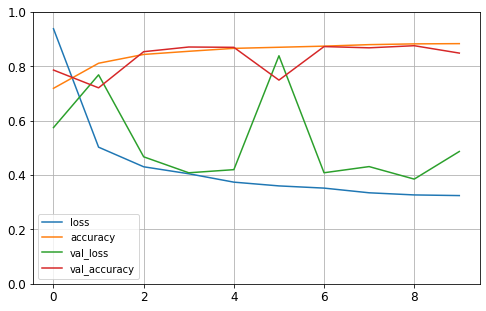

In [53]:
#Learning Curves
pd.DataFrame(history_Epochs10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epochs = 50

In [54]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_Epochs50 = model.fit(X_train, y_train, batch_size=32, epochs=50,validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3068 - accuracy: 0.8895 - val_loss: 0.4330 - val_accuracy: 0.8682
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2976 - accuracy: 0.8917 - val_loss: 0.4233 - val_accuracy: 0.8620
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2897 - accuracy: 0.8940 - val_loss: 0.4296 - val_accuracy: 0.8560
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2915 - accuracy: 0.8947 - val_loss: 0.3814 - val_accuracy: 0.8838
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2792 - accuracy: 0.8958 - val_loss: 0.4076 - val_accuracy: 0.8708
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2726 - accuracy: 0.9013 - val_loss: 0.3976 - val_accuracy: 0.8820
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9028 - val_loss: 0.3654 - val_accuracy:

In [55]:
#History
print("History Params : ", history_Epochs50.params)
print("History Epoch : ", history_Epochs50.epoch)
print("History Keys : " ,history_Epochs50.history.keys())

History Params :  {'verbose': 1, 'epochs': 50, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


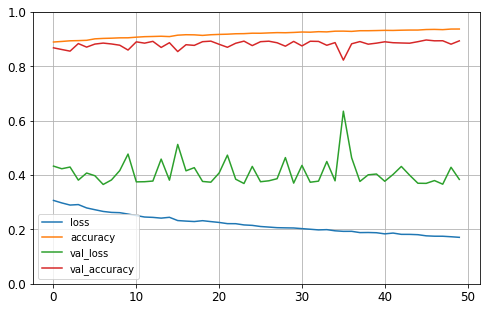

In [56]:
#Learning Curves
pd.DataFrame(history_Epochs50.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Add additional neurons & Use Dropout Layer

In [57]:
# Construct the Model
model_dropout = keras.models.Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=[28, 28]))
model_dropout.add(keras.layers.Dense(300, activation="relu"))
model_dropout.add(keras.layers.Dropout(0.2))
model_dropout.add(keras.layers.Dense(200, activation="relu"))
model_dropout.add(keras.layers.Dropout(0.2))
model_dropout.add(keras.layers.Dense(100, activation="relu"))
model_dropout.add(keras.layers.Dropout(0.2))
model_dropout.add(keras.layers.Dense(50, activation="relu"))
model_dropout.add(keras.layers.Dense(10, activation="softmax"))
#Layers
model_dropout.layers
#Compile the Model
model_dropout.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# Train the Model
history_dropout = model_dropout.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9954 - accuracy: 0.6331 - val_loss: 0.5477 - val_accuracy: 0.8050
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5812 - accuracy: 0.7921 - val_loss: 0.4496 - val_accuracy: 0.8386
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5056 - accuracy: 0.8198 - val_loss: 0.4126 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4655 - accuracy: 0.8337 - val_loss: 0.3843 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4385 - accuracy: 0.8418 - val_loss: 0.3800 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4184 - accuracy: 0.8502 - val_loss: 0.3550 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4007 - accuracy: 0.8567 - val_loss: 0.3515 - val_accuracy:

In [58]:
#History
print("History Params : ", history_dropout.params)
print("History Epoch : ", history_dropout.epoch)
print("History Keys : " ,history_dropout.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


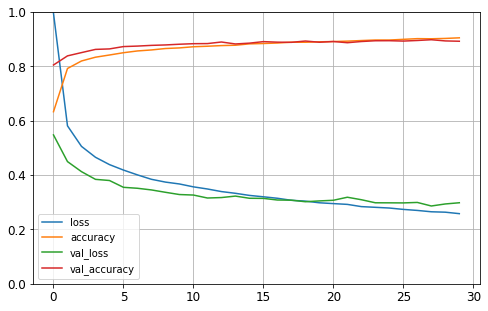

In [59]:
#Learning Curves
pd.DataFrame(history_dropout.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Use Batch Normalisation

In [60]:
# Construct the Model
model_batchNorm = keras.models.Sequential()
model_batchNorm.add(keras.layers.Flatten(input_shape=[28, 28]))

model_batchNorm.add(keras.layers.Dense(300, activation="relu"))
model_batchNorm.add(keras.layers.Dropout(0.2))
model_batchNorm.add(keras.layers.Dense(200, activation="relu"))
model_batchNorm.add(keras.layers.Dropout(0.2))
model_batchNorm.add(keras.layers.Dense(100, activation="relu"))
model_batchNorm.add(keras.layers.Dropout(0.2))
model_batchNorm.add(keras.layers.Dense(50, activation="relu"))

model_batchNorm.add(keras.layers.BatchNormalization())

model_batchNorm.add(keras.layers.Dense(10, activation="softmax"))


In [61]:
#Compile the Model
model_batchNorm.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

# Train the Model
history_batchNorm= model_dropout.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2575 - accuracy: 0.9040 - val_loss: 0.2884 - val_accuracy: 0.8976
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2516 - accuracy: 0.9077 - val_loss: 0.2952 - val_accuracy: 0.8938
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2490 - accuracy: 0.9073 - val_loss: 0.2893 - val_accuracy: 0.9032
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2472 - accuracy: 0.9072 - val_loss: 0.2826 - val_accuracy: 0.9008
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2442 - accuracy: 0.9098 - val_loss: 0.3014 - val_accuracy: 0.8952
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2438 - accuracy: 0.9093 - val_loss: 0.2887 - val_accuracy: 0.8966
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2383 - accuracy: 0.9118 - val_loss: 0.2909 - val_accuracy:

In [62]:
#History
print("History Params : ", history_batchNorm.params)
print("History Epoch : ", history_batchNorm.epoch)
print("History Keys : " ,history_batchNorm.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


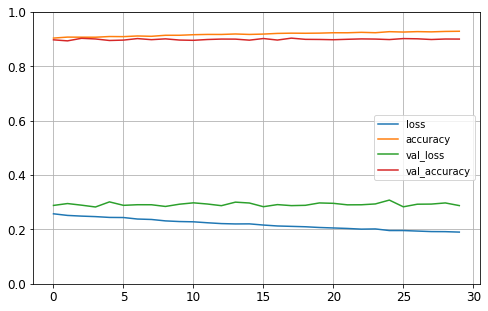

In [63]:
#Learning Curves
pd.DataFrame(history_batchNorm.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

4) repeat with more layers

In [64]:
# Construct the Model

model_newModel = keras.models.Sequential()
model_newModel.add(keras.layers.Flatten(input_shape=[28, 28]))

model_newModel.add(keras.layers.Dense(300, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(250, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(200, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(150, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(100, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(50, activation="relu"))

model_newModel.add(keras.layers.BatchNormalization())

model_newModel.add(keras.layers.Dense(10, activation="softmax"))


In [65]:
model_newModel.layers

In [66]:
#Compile the Model
model_newModel.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_newModel= model_newModel.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.9235 - accuracy: 0.6712 - val_loss: 0.4846 - val_accuracy: 0.8314
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5908 - accuracy: 0.7965 - val_loss: 0.4024 - val_accuracy: 0.8594
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5195 - accuracy: 0.8209 - val_loss: 0.4023 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4776 - accuracy: 0.8347 - val_loss: 0.3723 - val_accuracy: 0.8690
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4514 - accuracy: 0.8428 - val_loss: 0.3649 - val_accuracy: 0.8724
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4290 - accuracy: 0.8519 - val_loss: 0.3452 - val_accuracy: 0.8794
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4104 - accuracy: 0.8575 - val_loss: 0.3426 - val_accuracy:

In [67]:
#History
print("History Params : ", history_newModel.params)
print("History Epoch : ", history_newModel.epoch)
print("History Keys : " ,history_newModel.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


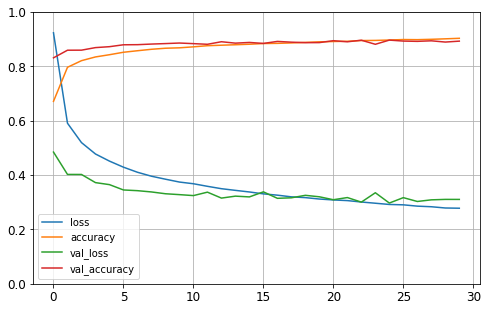

In [68]:
#Learning Curves
pd.DataFrame(history_newModel.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

5-Apply on Different Datasets

Dataset

In [69]:
from keras.datasets import mnist

    # DataLoader (The MNIST handwritten digits dataset)
mnist = keras.datasets.mnist
    # Process the data and split into a training and test set
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

print("The training set ", X_train_full.shape) #The training set contains 60 000 grayscale images, each 28x28 pixels
print("The test set ",X_test.shape) #The test set contains 10 000 grayscale images, each 28x28 pixels

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

#The full training set is splitted into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print("The validation set ",X_valid.shape) #The test set contains 5 000 grayscale images, each 28x28 pixels
print("The training set ",X_train.shape) #The test set contains 55 000 grayscale images, each 28x28 pixels


11493376/11490434 [==============================] - 0s 0us/step
The training set  (60000, 28, 28)
The test set  (10000, 28, 28)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The validation set  (5000, 28, 28)
The training set  (55000, 28, 28)


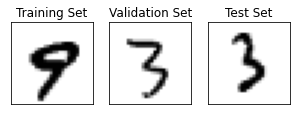

In [70]:
#Display Images

plt.subplots(figsize=(5, 5))
plt.subplot(231)
plt.title('Training Set')
plt.imshow(X_train[44], cmap="binary")
plt.xticks([]), plt.yticks([])

plt.subplot(232)
plt.title('Validation Set')
plt.imshow(X_valid[44], cmap="binary")
plt.xticks([]), plt.yticks([])
        
plt.subplot(233)
plt.title('Test Set')
plt.imshow(X_test[44], cmap="binary")
plt.xticks([]), plt.yticks([])

plt.show()

In [71]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

#Training Set
print("Class name of the training image : ",class_names[y_train[44]])
#Validation Set
print("Class name of the validation image : ",class_names[y_valid[44]])
#Test Set
print("Class name of the test image : ",class_names[y_test[44]])

Class name of the training image :  9
Class name of the validation image :  3
Class name of the test image :  3


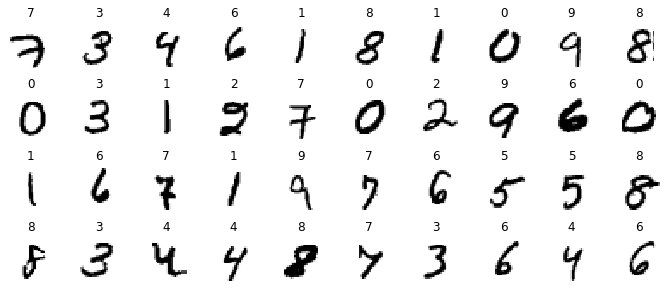

In [72]:
#Training

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

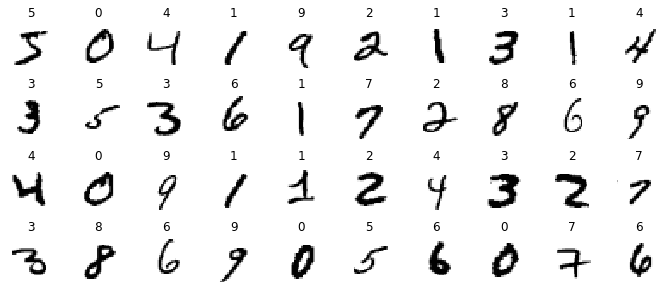

In [73]:
#Validation
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_valid[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_valid[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

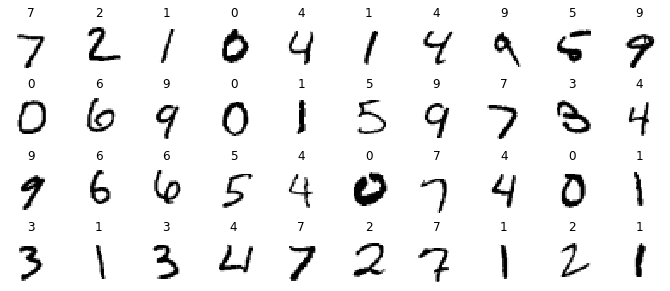

In [74]:
#Test
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [75]:
#Construct the Model
#The Model
handwritten_model = keras.models.Sequential()
handwritten_model.add(keras.layers.Flatten(input_shape=[28, 28]))
handwritten_model.add(keras.layers.Dense(300, activation="relu"))
handwritten_model.add(keras.layers.Dropout(0.2))
handwritten_model.add(keras.layers.Dense(200, activation="relu"))
handwritten_model.add(keras.layers.Dropout(0.2))
handwritten_model.add(keras.layers.Dense(100, activation="relu"))

handwritten_model.add(keras.layers.BatchNormalization())

handwritten_model.add(keras.layers.Dense(10, activation="softmax"))

In [76]:
#Layers
handwritten_model.layers

In [77]:
#Summary
handwritten_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_11 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [78]:
hidden1 = handwritten_model.layers[1]
print("Hidden1 : ",hidden1.name)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(handwritten_model.get_layer(hidden1.name) is hidden1)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
weights, biases = hidden1.get_weights()
print("Weights :  \n", weights)
print(" ------> Weights Shape : ", weights.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Biases :  \n", biases)
print(" ------>Biases Shape : ", biases.shape)

Hidden1 :  dense_20
~~~~~~~~~~~~~~~~~~~~~~~~~~
True
~~~~~~~~~~~~~~~~~~~~~~~~~~
Weights :  
 [[-0.04392263 -0.06577382 -0.03843642 ... -0.01744064  0.03870136
  -0.04082885]
 [-0.05797825 -0.0113107   0.0687445  ... -0.03350001  0.03807572
  -0.0727481 ]
 [-0.04769695  0.05008739  0.07232083 ...  0.02933696  0.00637676
   0.04706422]
 ...
 [-0.046614   -0.01614274 -0.00543226 ... -0.02282996 -0.00893468
   0.0656036 ]
 [-0.0385914   0.04712157 -0.07287815 ...  0.06980266 -0.01728987
  -0.04939836]
 [ 0.03066116  0.07269771 -0.03328489 ...  0.01830909 -0.00731388
  -0.00464242]]
 ------> Weights Shape :  (784, 300)
~~~~~~~~~~~~~~~~~~~~~~~~~~
Biases :  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [79]:
#The Loss Function, The Optimizer, The Performance Metric
handwritten_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [80]:
#Train the Mode
#Batch Size, Epochs
handwritten_history = handwritten_model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4868 - accuracy: 0.8495 - val_loss: 0.1823 - val_accuracy: 0.9454
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2429 - accuracy: 0.9280 - val_loss: 0.1332 - val_accuracy: 0.9618
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1855 - accuracy: 0.9454 - val_loss: 0.1119 - val_accuracy: 0.9662
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1545 - accuracy: 0.9540 - val_loss: 0.0975 - val_accuracy: 0.9702
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1362 - accuracy: 0.9583 - val_loss: 0.0916 - val_accuracy: 0.9736
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1161 - accuracy: 0.9650 - val_loss: 0.0850 - val_accuracy: 0.9744
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1058 - accuracy: 0.9675 - val_loss: 0.0836 - val_accuracy:

In [81]:
print("History Params : ", handwritten_history.params)
print("History Epoch : ", handwritten_history.epoch)
print("History Keys : " ,handwritten_history.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#Learning Curves"

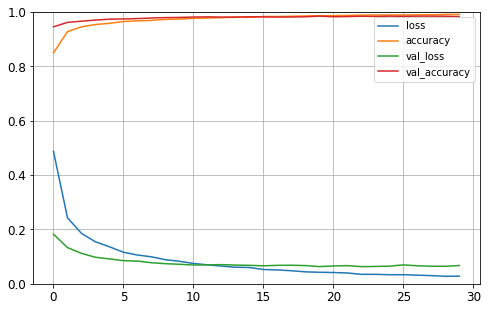

In [82]:
#Plotting Learning Curves
pd.DataFrame(handwritten_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [83]:
print("Evaluation : ", handwritten_model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9827
Evaluation :  [0.06536075472831726, 0.982699990272522]


In [84]:
X_new = X_test[:3]
y_proba = handwritten_model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [85]:
y_pred = handwritten_model.predict_classes(X_new)
print("y_pred : ", y_pred)

y_pred :  [7 2 1]


In [86]:
np.array(class_names)[y_pred]

array(['7', '2', '1'], dtype='<U1')

In [87]:
y_new = y_test[:3]
print("y_new : ", y_new)

y_new :  [7 2 1]


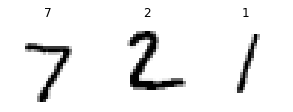

In [88]:
plt.figure(figsize=(5, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()